# Plano de aula 
Faremos mais um vez um ciclo fim a fim de tudo que aprendemos até aqui nas próximas duas aulas com um mesmo dataset. A primeira aula (05/10) será concentrada no EDA. A segunda aula (07/10) na modelagem. 
Cada aluno fará o exercício passo-a-passo e, a cada passo, atualizará seu notebook com a solução proposta através do git. Peço que:
1. Criem uma pasta para a aula 
2. Dentro dela, clonem o repositório https://github.com/etiecher/DH_pratica_housing_prices.git
3. A cada etapa vocês deverão submeter um push request da solução que desenvolveram
4. Na sequência apresentarei a solução proposta e vocês farão um git pull para que ao longo da aula possam ir utilizando mais facilmente os códigos desenvolvidos
5. Todos que me enviaram seus usuários github já foram adicionados com permissão para push. Quem não enviou pode informar agora.
6. Quem por algum motivo não conseguir utilizar git, me informe para que possamos organizar uma dupla. Podem indicar alguém ou posso sugerir alguém que já confirmou.

SETUP
- git clone https://github.com/etiecher/DH_pratica.git
- cd DH_pratica
- git config user.email 'seuemail@seuemail'
- git config user.name 'seu nome'

RECEBER DO REPOSITORIO REMOTO PARA O LOCAL
- git pull origin main

ENVIAR DO REPOSITORIO LOCAL PARA O REMOTO
- git add .
- git commit -m 'mensagem explicando'
- git push origin main           

## Etapas - 1a aula
    
- (10 min): Set-up para sincronizar soluções (git). 
- (05 min): Planejamento (aluno)
- (05 min): Solução proposta
- (30 min): Exploração inicial
- (10 min): Solução proposta
- (10 min): Intervalo
- (15 min): Conclusões iniciais
- (15 min): Solução proposta
- (30 min): Exploração secundária
- (20 min): Solução proposta / questão do aluno
- (20 min): Para casa: planejar os tempos para os próximos passos que serão realizados na próxima aula
    
## Etapas - 2a aula

- TBD

# Introdução do caso

<br>
<img src="img/house_price.png" width="950" />
<br>

No nosso exemplo vamos modelar uma regressão para explicar os preços das casas nos EUA.

    -> Identificar como a base foi construida
    -> Devemos nos preocupar os com outliers?
    -> Ao analisar como as variáveis estão distribuidas, temos funções conhecidas?
    -> Como as funções se correlacionam, os comportamentos são os previstos?
    -> Para estudar a correlação parcial com regressões precisamos mudar a forma dos dados?
    -> Variáveis dummies, quando usa-las
    -> Iterando váriaveis
    -> Gerando predições
    
Features:
- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

O dataset foi simplificado para a aula (algumas features foram excluídas). Dados originais disponíveis no Kaggle [clicando aqui](https://www.kaggle.com/harlfoxem/housesalesprediction)

--------------

# Aula 1 - EDA

## Importando os pacotes

In [20]:
# %load solucao3.1.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
def EDALUCIO(df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = df.columns.str.lower().tolist()
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), colunas))

    return eda



## Leitura dos dados

In [6]:
# %load solucao3.2.py
df = pd.read_csv("data/house_pricing_test.csv")
df.head()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,239000,3,1.0,1510,15022,1.0,0,3,0,1962,0,98003,47.330433,-122.303609,1510,12970
1,1260000,3,3.5,3220,3960,2.0,0,3,460,1991,0,98116,47.590933,-122.384230,3080,4444
2,414500,3,1.0,1050,6002,1.0,0,3,210,1941,0,98115,47.698761,-122.316010,1180,6003
3,252500,3,2.5,1780,7192,1.0,0,4,530,1974,0,98031,47.409319,-122.173484,1870,8500
4,389000,3,1.0,1330,3740,1.5,0,3,0,1903,0,98118,47.550242,-122.274232,1330,5053


## EDA

### Planejamento
(05 min): Escreva um texto detalhando o que planeja fazer para descrever os dados. Não descreva as funções e sim que tipo de informação você quer obter sobre os dados.

In [ ]:
# %load solucao3.3.1.py
# Como é foi construida, tamanho, volume de informação seja do ponto de vista de registros ou de caracteroisticas
# Verificar o nome das colunas e comparar com uma amostra simples ver se eles fazem sentido
# Verificar se os tipos estão corretos, se devem ser categóricas ou discretas
# Verificar quais os valores as variáveis podem assumir
# Como as variáveis estão distribuídas


### Análise exploratória inicial
(25 min): Escreva o codigo para realizar o que planejou. procure fazer primeiro os codigos mais simples, mais objetivos, os que vierem primeiro a cabeça.


Linhas: 1845, Colunas 16


,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
price,0,0.0,int64,1845,557127.04,457000.00,7.062500e+06,81000.000000,403208.18,905
num_bed,0,0.0,int64,1845,3.38,3.00,9.000000e+00,0.000000,0.94,10
num_bath,0,0.0,float64,1845,2.14,2.25,6.750000e+00,0.000000,0.79,22
size_house,0,0.0,int64,1845,2128.44,1950.00,1.004000e+04,410.000000,955.75,435
size_lot,0,0.0,int64,1845,15642.50,7700.00,1.024068e+06,649.000000,41323.93,1433
num_floors,0,0.0,float64,1845,1.52,1.50,3.500000e+00,1.000000,0.55,6
is_waterfront,0,0.0,int64,1845,0.01,0.00,1.000000e+00,0.000000,0.12,2
condition,0,0.0,int64,1845,3.38,3.00,5.000000e+00,1.000000,0.63,5
size_basement,0,0.0,int64,1845,290.64,0.00,4.820000e+03,0.000000,462.00,174
year_built,0,0.0,int64,1845,1971.82,1976.00,2.015000e+03,1900.000000,29.10,116


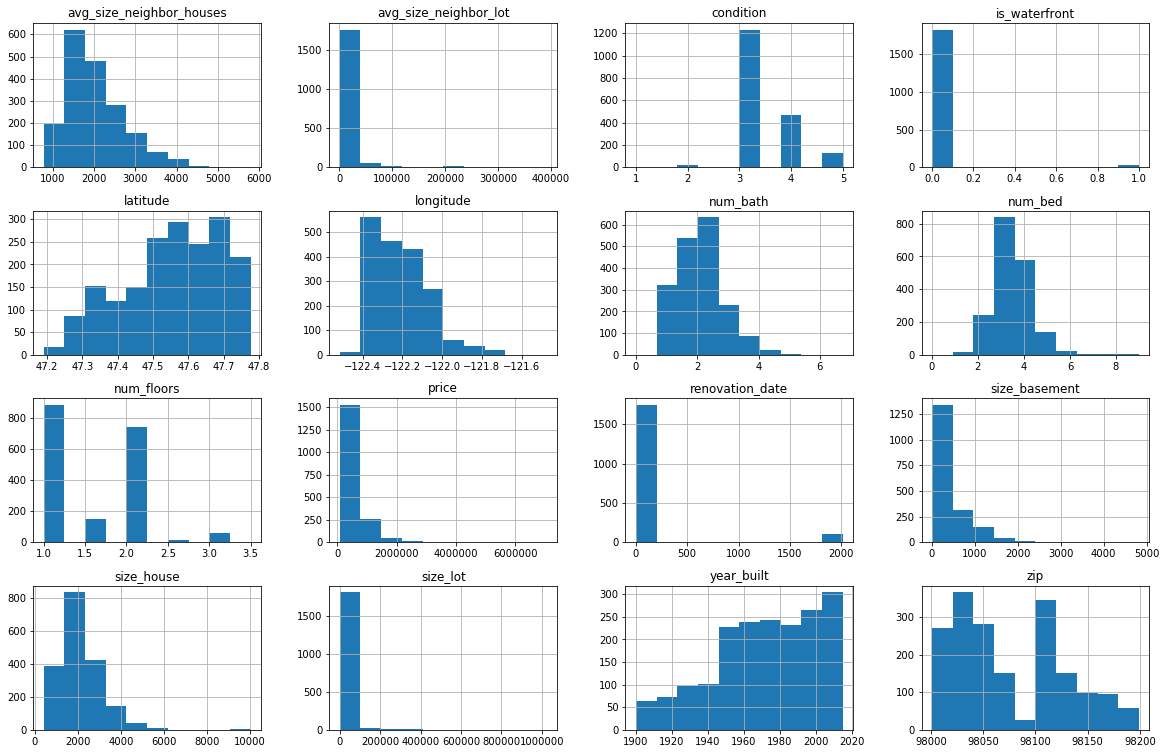

In [29]:
# %load solucao3.3.2.py
# Como é foi construida, tamanho, volume de informação seja do ponto de vista de registros ou de caracteroisticas
row, column = df.shape
print(f"Linhas: {row}, Colunas {column}")
# Verificar o nome das colunas e comparar com uma amostra simples ver se eles fazem sentido
df.dtypes
df.head()
# Verificar se os tipos estão corretos, se devem ser categóricas ou discretas
#del df["zip"]
# Verificar quais os valores as variáveis podem assumir
#df.info()
# Como as variáveis estão distribuídas

#zip code não agrega valor na regressão
#num_bath está com valores quebrados., devido a definição de presença de banheiro ou não
df.hist(figsize=(20,13))
EDALUCIO(df)

In [ ]:
# %load solucao3.3.2adicional.py

## Conclusões iniciais
(15 min): Reserve um tempo para olhar com calma as informações e tirar conclusões para próximos passos. Como no item 4.1, descreva em texto.

In [ ]:
# %load solucao3.4.0.py

## Reiterando na analise exploratória

(30 min): Escolha uma ou mais das conclusões (pense nos critérios: importância, facilidade, etc) e desenvolva o código.

In [ ]:
# %load solucao3.5.1.py


In [ ]:
# %load solucao3.5.1adicional.py

----------------
# Aula 2 - Modelagem

## Plano de aulas

%load solucao4.1.py